In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
df = pd.read_csv(r"C:\Users\mercy\Downloads\taxidata\taxi_tripdata.csv", low_memory=False)
df



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,01-07-2021 00:30,01-07-2021 00:35,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,01-07-2021 00:25,01-07-2021 01:01,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,01-07-2021 00:05,01-07-2021 00:12,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,01-07-2021 00:41,01-07-2021 00:47,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,01-07-2021 00:51,01-07-2021 00:58,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,02-07-2021 07:59,02-07-2021 08:33,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,02-07-2021 07:02,02-07-2021 07:18,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,02-07-2021 07:53,02-07-2021 08:15,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,02-07-2021 07:58,02-07-2021 08:30,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN


In [124]:
# Datetime columns are corrected with correct formart:
df["lpep_pickup_datetime"] = pd.to_datetime(df["lpep_pickup_datetime"], format="%d-%m-%Y %H:%M", errors="coerce")
df["lpep_dropoff_datetime"] = pd.to_datetime(df["lpep_dropoff_datetime"], format="%d-%m-%Y %H:%M", errors="coerce")


In [125]:
df = df.dropna(subset=["lpep_pickup_datetime", "lpep_dropoff_datetime"])
df.drop(columns=["ehail_fee"], inplace=True)

In [128]:
df["trip_duration"] = (df["lpep_dropoff_datetime"] - df["lpep_pickup_datetime"]).dt.total_seconds() / 60

In [130]:
df[["VendorID", "RatecodeID", "passenger_count", "payment_type", "trip_type", "congestion_surcharge"]] = df[["VendorID", "RatecodeID", "passenger_count", "payment_type", "trip_type","congestion_surcharge"]].apply(lambda x: x.fillna(x.median()))

In [132]:
# Removed negative or extreme values for fare, tip, total amount
df = df[(df["fare_amount"] > 0) & (df["total_amount"] > 0) & (df["tip_amount"] >= 0)]

In [134]:
# Removed unrealistic trip distances and durations:
df = df[(df["trip_distance"] > 0) & (df["trip_distance"] < 100)]
df = df[(df["trip_duration"] > 0) & (df["trip_duration"] < 500)]

In [136]:
print(df.describe())

          VendorID           lpep_pickup_datetime  \
count  79089.00000                          79089   
mean       1.92554  2021-07-16 12:33:02.281227264   
min        1.00000            2008-12-31 23:12:00   
25%        2.00000            2021-07-08 21:42:00   
50%        2.00000            2021-07-16 13:02:00   
75%        2.00000            2021-07-24 13:30:00   
max        2.00000            2021-08-01 00:06:00   
std        0.26252                            NaN   

               lpep_dropoff_datetime    RatecodeID  PULocationID  \
count                          79089  79089.000000  79089.000000   
mean   2021-07-16 12:53:16.936615424      1.058820    107.132484   
min              2008-12-31 23:27:00      1.000000      3.000000   
25%              2021-07-08 21:59:00      1.000000     55.000000   
50%              2021-07-16 13:23:00      1.000000     75.000000   
75%              2021-07-24 13:55:00      1.000000    166.000000   
max              2021-08-01 00:47:00      5.00

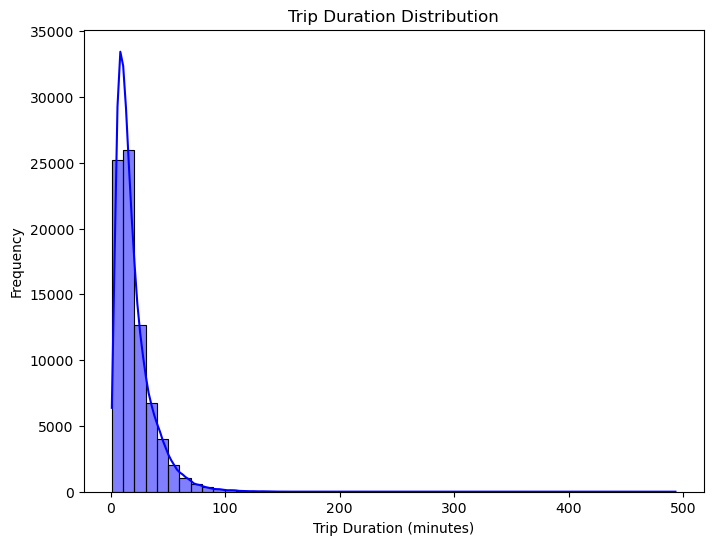

In [138]:
# Visualization of Trip Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["trip_duration"], bins=50, kde=True, color='blue')
plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [139]:
numeric_df = df.select_dtypes(include=[np.number])

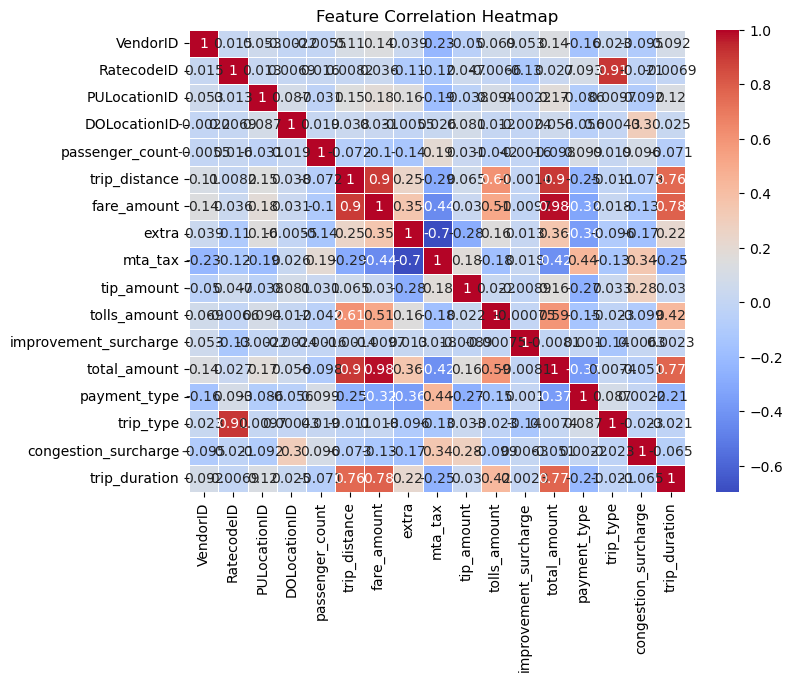

In [140]:
# correlation Heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

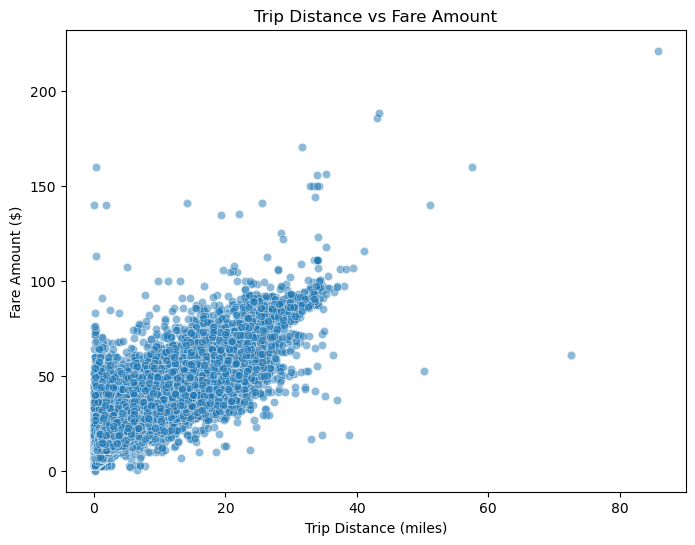

In [141]:
#Scatter plot: Trip Distance vs Fare Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["trip_distance"], y=df["fare_amount"], alpha=0.5)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

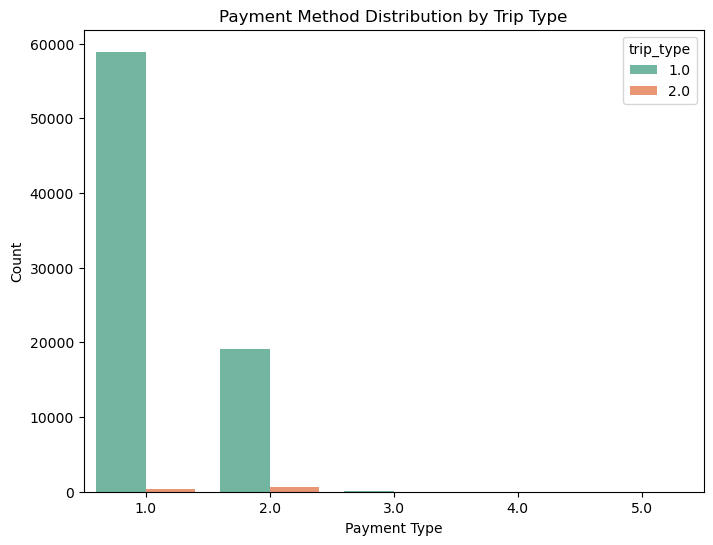

In [142]:
# Count plot of payment types
plt.figure(figsize=(8, 6))
sns.countplot(x=df["payment_type"], hue=df["trip_type"], palette="Set2")
plt.title("Payment Method Distribution by Trip Type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()